# Content-Based Recommendation Engine

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

## 1. Read the recommendation pool

In [2]:
#read data
chart_tracks_df=pd.read_csv("https://raw.githubusercontent.com/knocom/Sprint3_SpotifyRecommenderEngine/main/spotify_daily_charts_tracks_predicted_genres.csv")
#normalize loudness and tempo
#scaler = MinMaxScaler()
#chart_tracks_df['loudness'] = scaler.fit_transform(chart_tracks_df[['loudness']])
#chart_tracks_df['tempo'] =  scaler.fit_transform(chart_tracks_df[['tempo']])
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,predicted_genre_id,predicted_genre,predicted_genre_prob,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_folk_prob,predicted_hiphoprapcons_prob,predicted_jazz_prob,predicted_rock_prob
0,55CHeLEfn5iJ0IIkgaa4si,Savage,181bsRPaVXVlUKXrxwZfHK,Megan Thee Stallion,6Lo6ylJg4qbFfxicPEOzMI,155497,2020-03-06,82,0.843,0.741,...,4,hiphoprapcons,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0
1,7k4t7uLgtOxPwTpFmtJNTY,Tusa,790FomKkXshlbRYZFtlgla,KAROL G,7mKevNHhVnZER3BLgI8O4F,200960,2019-11-07,88,0.803,0.715,...,4,hiphoprapcons,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0
2,6KUE0HSSudAp9AOycaF6SH,Make It Right,3Nrfpe0tUJi4K4DXYWgMUX,BTS,1AvXa8xFEXtR3hb4bgihIK,226321,2019-04-12,72,0.638,0.703,...,4,hiphoprapcons,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0
3,6EDO9iiTtwNv6waLwa1UUq,POPSTAR (feat. Drake),0QHgL1lAIqAw0HtD7YldmP,DJ Khaled,5nNtpPsSUgb9Hlb3dF1gXa,200221,2020-07-17,93,0.800,0.560,...,4,hiphoprapcons,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0
4,6EOKwHETwSkZ9gW2b6ASE0,Ransom,4Ga1P7PMIsmqEZqhYZQgDo,Lil Tecca,65T18oWoikW2MAilg9j8lW,131240,2019-08-30,3,0.745,0.642,...,4,hiphoprapcons,0.956522,0.0,0.0,0.043478,0.0,0.956522,0.0,0.0


In [3]:
chart_tracks_df.shape

(1061, 29)

## 2. Input Seed Track


In [4]:
feature_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',\
                'liveness', 'valence', 'tempo']

In [5]:
seed_track_data = chart_tracks_df[chart_tracks_df['track_name']=='Memories'].iloc[0]
seed_track_data[feature_cols]

danceability           0.764
energy                  0.32
loudness            0.732789
speechiness           0.0546
acousticness           0.837
instrumentalness           0
liveness              0.0822
valence                0.575
tempo               0.248199
Name: 353, dtype: object

In [6]:
chart_tracks_df.columns

Index(['track_id', 'track_name', 'artist_id', 'artist_name', 'album_id',
       'duration', 'release_date', 'popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'predicted_genre_id', 'predicted_genre', 'predicted_genre_prob',
       'predicted_classical_prob', 'predicted_country_prob',
       'predicted_electronic_prob', 'predicted_folk_prob',
       'predicted_hiphoprapcons_prob', 'predicted_jazz_prob',
       'predicted_rock_prob'],
      dtype='object')

## 3. Explore Similarity Measures

In [7]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
    

##### Use audio features only

Euclidean

In [8]:
chart_tracks_df['euclidean_dist'] = chart_tracks_df.apply(lambda x: euclidean_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('euclidean_dist')[:10]
recommendation_df[['track_name','artist_name','euclidean_dist','predicted_genre']+feature_cols]

,track_name,artist_name,euclidean_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
583,Normalan,Shanti Dope,0.001,country,0.765,0.438,0.511460,0.0558,0.52400,0.000015,0.1940,0.506,0.396626
390,Havana (feat. Young Thug),Camila Cabello,0.001,hiphoprapcons,0.765,0.523,0.856461,0.0300,0.18400,0.000036,0.1320,0.394,0.338377
839,What You Waiting For,SOMI,0.001,hiphoprapcons,0.765,0.688,0.824683,0.0731,0.01640,0.000000,0.1120,0.794,0.447561
626,Pangga,Matthaios,0.001,folk,0.765,0.437,0.499677,0.0730,0.86100,0.000000,0.1130,0.535,0.629222
380,"always, i'll care",Jeremy Zucker,0.002,folk,0.766,0.163,0.355837,0.0573,0.92000,0.000132,0.1070,0.634,0.338177
547,Miloves (Otw Sayo),King Badger,0.002,country,0.766,0.514,0.588132,0.1010,0.23900,0.000008,0.0879,0.682,0.538753
887,New Rules,Dua Lipa,0.002,hiphoprapcons,0.762,0.700,0.783874,0.0694,0.00261,0.000016,0.1530,0.608,0.409938
151,Savage Love (Laxed - Siren Beat),Jawsh 685,0.003,country,0.767,0.481,0.676414,0.0803,0.23400,0.000000,0.2690,0.761,0.629448
100,Laugh Now Cry Later (feat. Lil Durk),Drake,0.003,hiphoprapcons,0.761,0.518,0.661320,0.1340,0.24400,0.000035,0.1070,0.522,0.525513
943,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.004,country,0.760,0.479,0.803096,0.0466,0.55600,0.000000,0.0703,0.913,0.241046


Manhattan

In [9]:
chart_tracks_df['manhattan_dist'] = chart_tracks_df.apply(lambda x: manhattan_distances(x[feature_cols].values.reshape(-1, 1),\
                                                                  seed_track_data[feature_cols].values.reshape(-1, 1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('manhattan_dist')[:10]
recommendation_df[['track_name','artist_name','manhattan_dist','predicted_genre']+feature_cols]

,track_name,artist_name,manhattan_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
626,Pangga,Matthaios,0.001,folk,0.765,0.437,0.499677,0.0730,0.86100,0.000000,0.1130,0.535,0.629222
583,Normalan,Shanti Dope,0.001,country,0.765,0.438,0.511460,0.0558,0.52400,0.000015,0.1940,0.506,0.396626
390,Havana (feat. Young Thug),Camila Cabello,0.001,hiphoprapcons,0.765,0.523,0.856461,0.0300,0.18400,0.000036,0.1320,0.394,0.338377
839,What You Waiting For,SOMI,0.001,hiphoprapcons,0.765,0.688,0.824683,0.0731,0.01640,0.000000,0.1120,0.794,0.447561
547,Miloves (Otw Sayo),King Badger,0.002,country,0.766,0.514,0.588132,0.1010,0.23900,0.000008,0.0879,0.682,0.538753
380,"always, i'll care",Jeremy Zucker,0.002,folk,0.766,0.163,0.355837,0.0573,0.92000,0.000132,0.1070,0.634,0.338177
887,New Rules,Dua Lipa,0.002,hiphoprapcons,0.762,0.700,0.783874,0.0694,0.00261,0.000016,0.1530,0.608,0.409938
151,Savage Love (Laxed - Siren Beat),Jawsh 685,0.003,country,0.767,0.481,0.676414,0.0803,0.23400,0.000000,0.2690,0.761,0.629448
100,Laugh Now Cry Later (feat. Lil Durk),Drake,0.003,hiphoprapcons,0.761,0.518,0.661320,0.1340,0.24400,0.000035,0.1070,0.522,0.525513
773,Blank Space,Taylor Swift,0.004,country,0.760,0.703,0.810062,0.0540,0.10300,0.000000,0.0913,0.570,0.280335


Cosine

In [10]:
chart_tracks_df['cosine_dist'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[feature_cols].values.reshape(1, -1),\
                                                                  seed_track_data[feature_cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']].sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
717,At My Worst,Pink Sweat$,0.004578,folk,0.813,0.415,0.787960,0.0349,0.777,0.000000,0.1310,0.667,0.254022
919,Mean It - stripped,Lauv,0.006591,folk,0.538,0.228,0.576779,0.0334,0.746,0.000000,0.1260,0.517,0.247508
624,Hiling,Mark Carpio,0.007944,folk,0.580,0.244,0.616341,0.0361,0.808,0.000000,0.0920,0.385,0.190757
223,Closed On Sunday,Kanye West,0.008145,folk,0.799,0.291,0.726596,0.0318,0.873,0.000641,0.1390,0.406,0.293162
962,Too Good At Goodbyes,Sam Smith,0.008589,country,0.681,0.372,0.688583,0.0432,0.640,0.000000,0.1690,0.476,0.253712
405,This City,Sam Fischer,0.009504,folk,0.602,0.377,0.775618,0.0446,0.731,0.000000,0.0808,0.518,0.137537
843,betty,Taylor Swift,0.010359,folk,0.593,0.377,0.666050,0.0253,0.600,0.000000,0.0976,0.502,0.279960
271,"always, i'll care",Jeremy Zucker,0.013037,folk,0.784,0.278,0.580735,0.0410,0.918,0.000196,0.1120,0.741,0.338674
215,invisible string,Taylor Swift,0.013378,folk,0.653,0.452,0.563621,0.0550,0.838,0.000077,0.1080,0.450,0.199227
177,invisible string,Taylor Swift,0.013378,folk,0.653,0.452,0.563621,0.0550,0.838,0.000077,0.1080,0.450,0.199227


View histograms of the 3 similarity measures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7A6A0E8B0>,
      dtype=object)

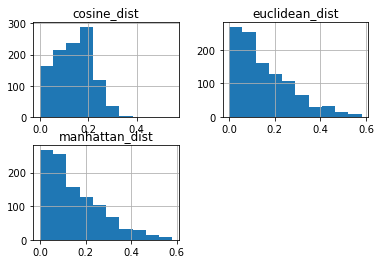

In [11]:
chart_tracks_df[['euclidean_dist','manhattan_dist','cosine_dist']].hist()

## 4. Modify similarity criteria

##### Audio features and with same predicted genre

In [12]:
#get top 10 nearest to seed_track_data
recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\
                                    [chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                    .sort_values('cosine_dist')[:10]
recommendation_df[['track_name','artist_name','cosine_dist','predicted_genre']+feature_cols]

<ipython-input-12-3525b1bc5e04>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recommendation_df = chart_tracks_df[chart_tracks_df['predicted_genre']==seed_track_data['predicted_genre']]\


,track_name,artist_name,cosine_dist,predicted_genre,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
717,At My Worst,Pink Sweat$,0.004578,folk,0.813,0.415,0.787960,0.0349,0.777,0.000000,0.1310,0.667,0.254022
919,Mean It - stripped,Lauv,0.006591,folk,0.538,0.228,0.576779,0.0334,0.746,0.000000,0.1260,0.517,0.247508
624,Hiling,Mark Carpio,0.007944,folk,0.580,0.244,0.616341,0.0361,0.808,0.000000,0.0920,0.385,0.190757
223,Closed On Sunday,Kanye West,0.008145,folk,0.799,0.291,0.726596,0.0318,0.873,0.000641,0.1390,0.406,0.293162
405,This City,Sam Fischer,0.009504,folk,0.602,0.377,0.775618,0.0446,0.731,0.000000,0.0808,0.518,0.137537
843,betty,Taylor Swift,0.010359,folk,0.593,0.377,0.666050,0.0253,0.600,0.000000,0.0976,0.502,0.279960
271,"always, i'll care",Jeremy Zucker,0.013037,folk,0.784,0.278,0.580735,0.0410,0.918,0.000196,0.1120,0.741,0.338674
177,invisible string,Taylor Swift,0.013378,folk,0.653,0.452,0.563621,0.0550,0.838,0.000077,0.1080,0.450,0.199227
215,invisible string,Taylor Swift,0.013378,folk,0.653,0.452,0.563621,0.0550,0.838,0.000077,0.1080,0.450,0.199227
1043,Urong Sulong,Alisson Shore,0.014306,folk,0.746,0.350,0.670866,0.0740,0.572,0.000007,0.1180,0.612,0.177232


###### Audio features and genre probabilities

In [13]:
genre_cols = [col for col in chart_tracks_df.columns if ('predicted_' in col)&('genre' not in col)]
cols = feature_cols + genre_cols
chart_tracks_df['cosine_dist_mod'] = chart_tracks_df.apply(lambda x: 1-cosine_similarity(x[cols].values.reshape(1, -1),\
                                                                  seed_track_data[cols].values.reshape(1, -1))\
                                                                  .flatten()[0], axis=1)
recommendation_df = chart_tracks_df[chart_tracks_df['track_id']!=seed_track_data['track_id']]\
                                   .sort_values('cosine_dist_mod')[:10]
recommendation_df[['track_id','track_name','artist_name','cosine_dist_mod','predicted_genre']+cols]

,track_id,track_name,artist_name,cosine_dist_mod,predicted_genre,danceability,energy,loudness,speechiness,acousticness,...,liveness,valence,tempo,predicted_classical_prob,predicted_country_prob,predicted_electronic_prob,predicted_folk_prob,predicted_hiphoprapcons_prob,predicted_jazz_prob,predicted_rock_prob
717,0ri0Han4IRJhzvERHOZTMr,At My Worst,Pink Sweat$,0.008982,folk,0.813,0.415,0.787960,0.0349,0.777,...,0.1310,0.667,0.254022,0.000000,0.217391,0.0,0.391304,0.130435,0.130435,0.130435
223,3JWiDGQX2eTlFvKj3Yssj3,Closed On Sunday,Kanye West,0.009934,folk,0.799,0.291,0.726596,0.0318,0.873,...,0.1390,0.406,0.293162,0.043478,0.130435,0.0,0.565217,0.086957,0.130435,0.043478
405,3H3r2nKWa3Yk5gt8xgmsEt,This City,Sam Fischer,0.010646,folk,0.602,0.377,0.775618,0.0446,0.731,...,0.0808,0.518,0.137537,0.043478,0.260870,0.0,0.478261,0.043478,0.130435,0.043478
271,1LdS1ULS9e18oW3M2C1MUj,"always, i'll care",Jeremy Zucker,0.014836,folk,0.784,0.278,0.580735,0.0410,0.918,...,0.1120,0.741,0.338674,0.043478,0.217391,0.0,0.521739,0.000000,0.173913,0.043478
215,6VsvKPJ4xjVNKpI8VVZ3SV,invisible string,Taylor Swift,0.017701,folk,0.653,0.452,0.563621,0.0550,0.838,...,0.1080,0.450,0.199227,0.043478,0.173913,0.0,0.608696,0.000000,0.130435,0.043478
177,3yz88FVJQhwG2EqYHw3pkx,invisible string,Taylor Swift,0.017701,folk,0.653,0.452,0.563621,0.0550,0.838,...,0.1080,0.450,0.199227,0.043478,0.173913,0.0,0.608696,0.000000,0.130435,0.043478
115,46zaR58Xb71HqoR5CTbQAX,Beautiful Scars - Acoustic,Maximillian,0.018169,folk,0.803,0.309,0.684799,0.0401,0.855,...,0.1050,0.733,0.518089,0.043478,0.173913,0.0,0.652174,0.000000,0.086957,0.043478
245,0rbKrBvZUYY9GN9l057BuY,"always, i'll care",Jeremy Zucker,0.021636,folk,0.732,0.221,0.499978,0.0560,0.897,...,0.1100,0.677,0.339520,0.086957,0.217391,0.0,0.565217,0.000000,0.130435,0.000000
843,5kI4eCXXzyuIUXjQra0Cxi,betty,Taylor Swift,0.021753,folk,0.593,0.377,0.666050,0.0253,0.600,...,0.0976,0.502,0.279960,0.000000,0.304348,0.0,0.347826,0.000000,0.173913,0.173913
478,3IJYUaN3tx04S4TYyZHKoP,Party Girl,StaySolidRocky,0.022075,folk,0.730,0.439,0.618620,0.0609,0.747,...,0.0988,0.615,0.500426,0.043478,0.260870,0.0,0.478261,0.000000,0.130435,0.086957


In [14]:
recommendation_df['track_id'].values

array(['0ri0Han4IRJhzvERHOZTMr', '3JWiDGQX2eTlFvKj3Yssj3',
       '3H3r2nKWa3Yk5gt8xgmsEt', '1LdS1ULS9e18oW3M2C1MUj',
       '6VsvKPJ4xjVNKpI8VVZ3SV', '3yz88FVJQhwG2EqYHw3pkx',
       '46zaR58Xb71HqoR5CTbQAX', '0rbKrBvZUYY9GN9l057BuY',
       '5kI4eCXXzyuIUXjQra0Cxi', '3IJYUaN3tx04S4TYyZHKoP'], dtype=object)

## Day Deliverable

*Groupwork*
1. Explore different seed tracks configurations:
    - A single track
    - A *representative track* made by aggregating the audio features and genre probabilities of all tracks in a chosen album/genre
    - A *hypothetical track* with specified desired audio feature values
    
    
2. For each choice of seed track in (1), repeat notebook Steps 2-4 and discuss if the recommended tracks make sense. As a user, would you listen to the recommended tracks?

3. In addition to (2), check if the top 10 tracks with the **worst** similarity measure (i.e. most dissimilar to the seed track) make sense. As a user, do you agree that these are the tracks to be first discarded from the recommendation pool?
